In [1]:
cd ..

/mnt/d/Projekty/doggofier


# Model training

In [9]:
import matplotlib.pyplot as plt

import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms

from torchsummary import summary

from torch.utils.data import DataLoader, random_split

from doggofier.dataset import DogsDataset
from doggofier.models import ResNet50
from doggofier.train import train

In [3]:
train_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

dataset = DogsDataset('data', train=True, transform=train_transform)

length = len(dataset)
train_dataset, val_dataset = random_split(dataset, [int(0.9 * length), int(0.1 * length) + 1])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [4]:
num_classes = len(dataset.get_categories())
model = ResNet50(num_classes)

summary(model, input_size=(3, 224, 224), batch_size=32)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [32, 64, 112, 112]           9,408
       BatchNorm2d-2         [32, 64, 112, 112]             128
              ReLU-3         [32, 64, 112, 112]               0
         MaxPool2d-4           [32, 64, 56, 56]               0
            Conv2d-5           [32, 64, 56, 56]           4,096
       BatchNorm2d-6           [32, 64, 56, 56]             128
              ReLU-7           [32, 64, 56, 56]               0
            Conv2d-8           [32, 64, 56, 56]          36,864
       BatchNorm2d-9           [32, 64, 56, 56]             128
             ReLU-10           [32, 64, 56, 56]               0
           Conv2d-11          [32, 256, 56, 56]          16,384
      BatchNorm2d-12          [32, 256, 56, 56]             512
           Conv2d-13          [32, 256, 56, 56]          16,384
      BatchNorm2d-14          [32, 256,

In [5]:
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters())

In [6]:
resnet50_history = train(model, criterion, optimizer, train_loader, val_loader, save_path='models/resnet50.pth', epochs=10)

Epoch: 1 / 10	                        Step: 100 / 1835	                        Loss: 3.497567970752716
Epoch: 1 / 10	                        Step: 200 / 1835	                        Loss: 3.17079536318779
Epoch: 1 / 10	                        Step: 300 / 1835	                        Loss: 2.977753713130951
Epoch: 1 / 10	                        Step: 400 / 1835	                        Loss: 2.8314474406838417
Epoch: 1 / 10	                        Step: 500 / 1835	                        Loss: 2.73219563126564
Epoch: 1 / 10	                        Step: 600 / 1835	                        Loss: 2.6338785235087077
Epoch: 1 / 10	                        Step: 700 / 1835	                        Loss: 2.5652537282875607
Epoch: 1 / 10	                        Step: 800 / 1835	                        Loss: 2.498779750615358
Epoch: 1 / 10	                        Step: 900 / 1835	                        Loss: 2.4431324211756387
Epoch: 1 / 10	                        Step: 1000 / 1835	               

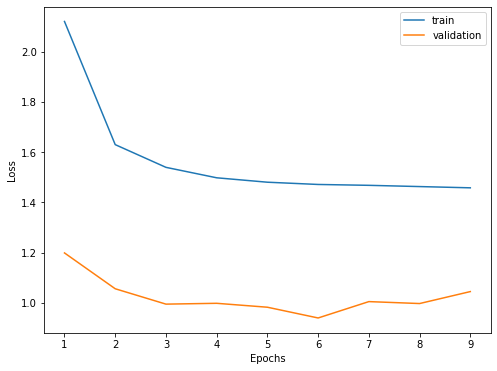

In [11]:
plt.figure(figsize=(8, 6))

plt.plot(range(1, 10), resnet50_history['train_loss'], label='train')
plt.plot(range(1, 10), resnet50_history['val_loss'], label='validation')

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()

plt.show()